## Used Car Prices


#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Conclusion

### 1) Problem statement
- The provided contains various details and attributes associated with used cars. The target variable, which is the central focus of analysis, is the price of the used cars, and it is measured in lakhs.

### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/sujay1844/used-car-prices

- The data consists of 12 column and 5847 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [ ]:
df = pd.read_csv('used_car_price.csv')
df.drop(columns = df.columns[0], axis=1, inplace=True)

#### Show Top 5 Records

In [ ]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
1,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,13 km/kg,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
2,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
3,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
4,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50


#### Shape of the dataset

In [ ]:
df.shape

(5847, 13)

### 2.2 Dataset information

- Make and model of the car
- Location or city of sale
- Year of manufacture
- Mileage
- Odometer (kilometers driven)
- Fuel type (petrol or diesel)
- Transmission type (manual or automatic)
- Number of owners
- Engine displacement
- Engine horsepower
- Number of seats
- Price when the car was new



### 2.3 Dataset preparation

The following features contain added string units, to make it easy for the model to train, we'll add the unit at the top, with the column name

In [ ]:
df["Mileage"] = [float(str(i).split(" ")[0]) for i in  df["Mileage"].values]
df["Engine"] = [float(str(i).split(" ")[0]) for i in  df["Engine"].values]
df["Power"] = [float(str(i).split(" ")[0]) for i in  df["Power"].values]

df = df.rename(columns={'Mileage': 'Mileage (kmpl)', 'Engine': 'Engine (CC)', 'Power': 'Power (bhp)'})

Also, in our case study, we won't take the car name in consideration

In [ ]:
df.drop(columns = "Name", axis=1, inplace=True)

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [ ]:
df.isna().sum()

Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage (kmpl)          2
Engine (CC)            36
Power (bhp)            36
Seats                  38
New_Price            5032
Price                   0
dtype: int64

#### There are missing values in the data set in the following columns :

*   Mileage (kmpl) 2 (for this feature, we'll delete the rows canitaining nan values)
*   Engine (CC) 36 (for this feature, we'll replace the NaN values by the mean values)
*   Power (bhp) 36 (for this feature, we'll replace the NaN values by the mean values)
*   Seats 38 (for this feature, we'll replace the NaN values by the mean values)
*   New_Price 5032 (for this feature, because there is a lot of missing values "86%", we won't take it in consederation in our study)


In [ ]:
df["Mileage (kmpl)"].dropna(inplace=True)
df["Engine (CC)"].fillna(df["Seats"].mean(), inplace=True)
df["Power (bhp)"].fillna(df["Seats"].mean(), inplace=True)
df["Seats"].fillna(df["Seats"].mean(), inplace=True)
df.dropna(subset = ["Mileage (kmpl)"], inplace=True)
df.drop(columns = "New_Price", axis=1, inplace=True)

In [ ]:
df.isna().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage (kmpl)       0
Engine (CC)          0
Power (bhp)          0
Seats                0
Price                0
dtype: int64

There are no missing values in the data set anymore, now **WE ARE READY TO GO**

### 3.2 Check Duplicates

In [ ]:
df.duplicated().sum()

2

#### There are 2 duplicates  values in the data set

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.duplicated().sum()

0

There are no duplicates values in the data set anymore, now **WE ARE READY TO GO**

#### Save the clean data

In [ ]:
df.to_csv("data_UCP.csv", index=False)

### 3.3 Check data types

In [ ]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5843 entries, 0 to 5846
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5843 non-null   object 
 1   Year               5843 non-null   int64  
 2   Kilometers_Driven  5843 non-null   int64  
 3   Fuel_Type          5843 non-null   object 
 4   Transmission       5843 non-null   object 
 5   Owner_Type         5843 non-null   object 
 6   Mileage (kmpl)     5843 non-null   float64
 7   Engine (CC)        5843 non-null   float64
 8   Power (bhp)        5843 non-null   float64
 9   Seats              5843 non-null   float64
 10  Price              5843 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 547.8+ KB


Normaly **Mileage (kmpl)**, **Power (CC)**, **Power (bhp)** should be numeric values, whereas they are categoircal. So a type transformation is needed

In [ ]:
pd.to_numeric(df["Mileage (kmpl)"])
pd.to_numeric(df["Engine (CC)"])
pd.to_numeric(df["Power (bhp)"])

0       126.20
1        88.70
2        88.76
3       140.80
4        63.10
         ...  
5842     74.00
5843     71.00
5844    112.00
5845     67.10
5846     57.60
Name: Power (bhp), Length: 5843, dtype: float64

### 3.4 Checking the number of unique values of each column

In [ ]:
df.nunique()

Location               11
Year                   22
Kilometers_Driven    3019
Fuel_Type               2
Transmission            2
Owner_Type              4
Mileage (kmpl)        418
Engine (CC)           140
Power (bhp)           359
Seats                   9
Price                1366
dtype: int64

### 3.5 Check statistics of data set

In [ ]:
df.describe()

,Year,Kilometers_Driven,Mileage (kmpl),Engine (CC),Power (bhp),Seats,Price
count,5843.000000,5.843000e+03,5843.000000,5843.000000,5843.000000,5843.000000,5843.000000
mean,2013.449084,5.842014e+04,18.156652,1621.979858,113.172357,5.286648,9.654532
std,3.194419,9.241024e+04,4.357271,613.209824,54.395491,0.804282,11.279118
min,1998.000000,1.710000e+02,0.000000,5.286452,5.286452,2.000000,0.440000
25%,2012.000000,3.346750e+04,15.230000,1198.000000,76.000000,5.000000,3.550000
50%,2014.000000,5.261800e+04,18.190000,1496.000000,98.590000,5.000000,5.750000
75%,2016.000000,7.249750e+04,21.100000,1991.000000,138.100000,5.000000,10.250000
max,2019.000000,6.500000e+06,28.400000,5998.000000,560.000000,10.000000,160.000000


####  Insights
- There is a big variation between the car's price.

### 3.6 Exploring Data

In [ ]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage (kmpl),Engine (CC),Power (bhp),Seats,Price
0,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
1,Chennai,2011,46000,Petrol,Manual,First,13.00,1199.0,88.70,5.0,4.50
2,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
3,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
4,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50


In [ ]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 7 numerical features : ['Year', 'Kilometers_Driven', 'Mileage (kmpl)', 'Engine (CC)', 'Power (bhp)', 'Seats', 'Price']

We have 4 categorical features : ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type']


In [ ]:
print(f"Categories in 'Location' variable: {df['Location'].unique()}")

print(f"Categories in 'Fuel_Type' variable:  {df['Fuel_Type'].unique()}")

print(f"Categories in 'Transmission' variable: {df['Transmission'].unique()}")

print(f"Categories in 'Owner_Type' variable: {df['Owner_Type'].unique()}")

Categories in 'Location' variable: ['Pune' 'Chennai' 'Coimbatore' 'Jaipur' 'Mumbai' 'Kochi' 'Kolkata' 'Delhi'
 'Bangalore' 'Hyderabad' 'Ahmedabad']
Categories in 'Fuel_Type' variable:  ['Diesel' 'Petrol']
Categories in 'Transmission' variable: ['Manual' 'Automatic']
Categories in 'Owner_Type' variable: ['First' 'Second' 'Fourth & Above' 'Third']


### 4. Exploring Data ( Visualization )

#### 4.1. Correlation

<Axes: >

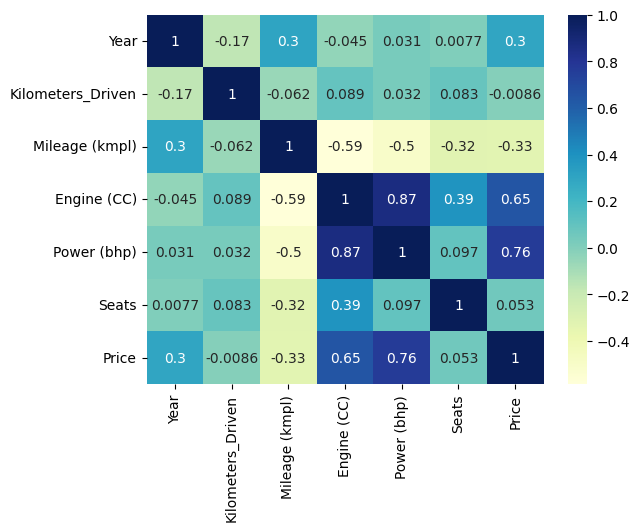

In [ ]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

#####  Insights
- The **Engines** and car **Power** are 2 major factors in the car price.
- We may think that the number of **Seats** and **Kilometers Driven** impact the car price, based on the map of correlation, it seems that they don't.

#### 4.2 Visualize price car distribution to make some conclusion.

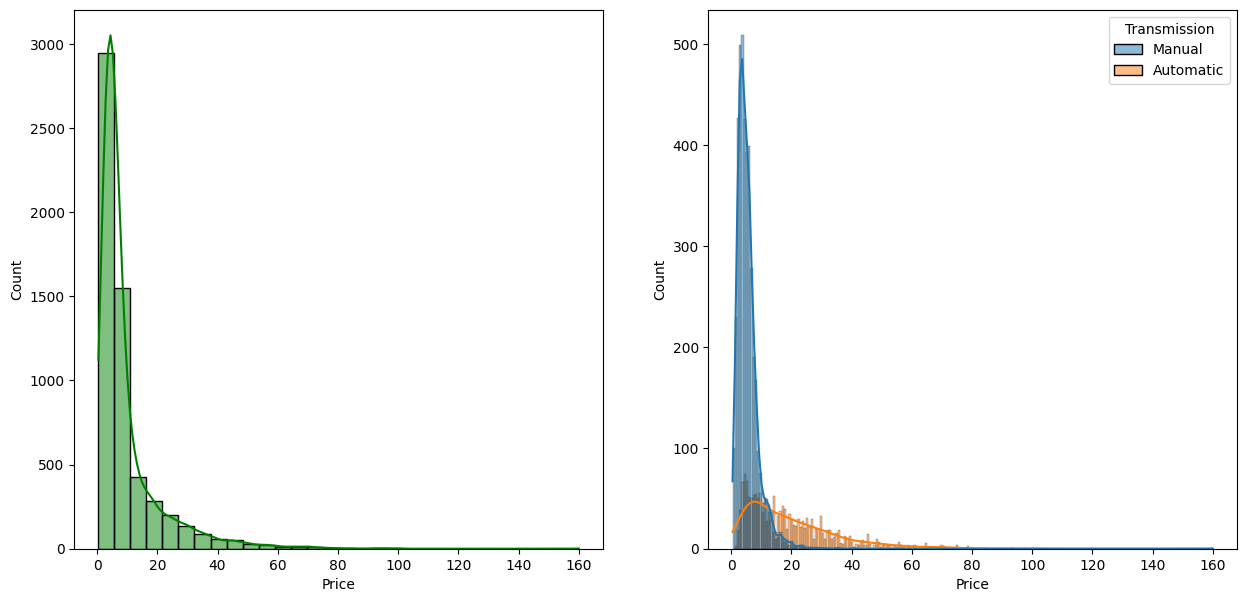

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Price',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Price',kde=True,hue='Transmission')
plt.show()

#####  Insights
- Manual cars are communly used, because they are cheaper than automatic cars.

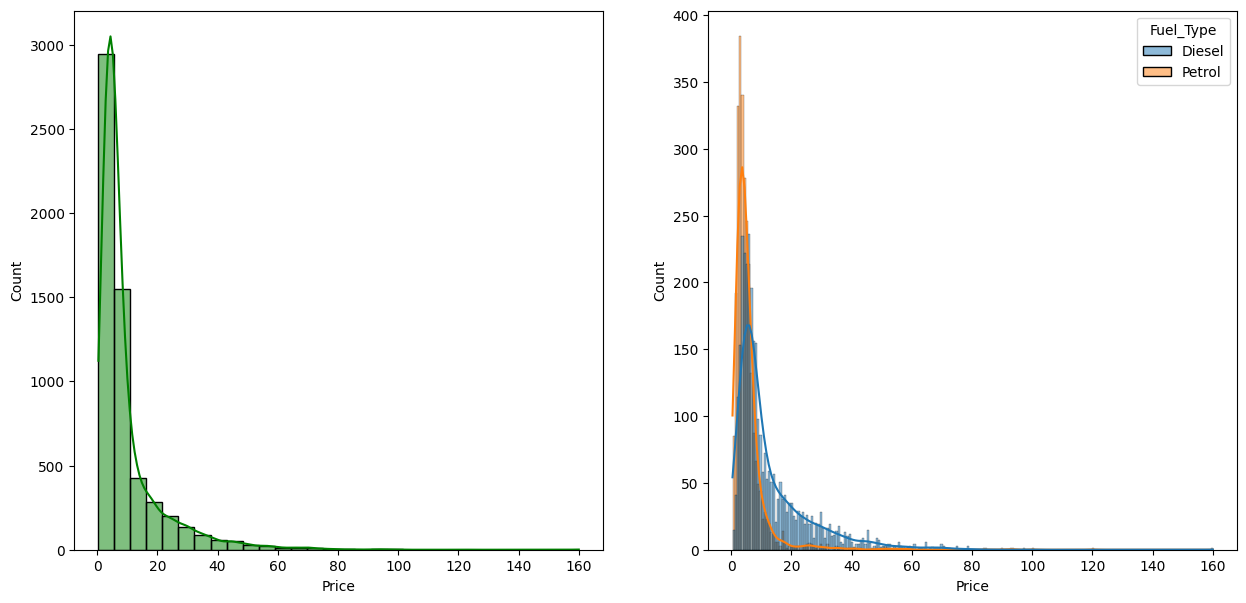

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Price',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Price',kde=True,hue='Fuel_Type')
plt.show()

#####  Insights
- Petrol cars are communly used, and maybe because they are cheaper than Diesel/Petrol cars.

#### 4.3 Visualize the market trend

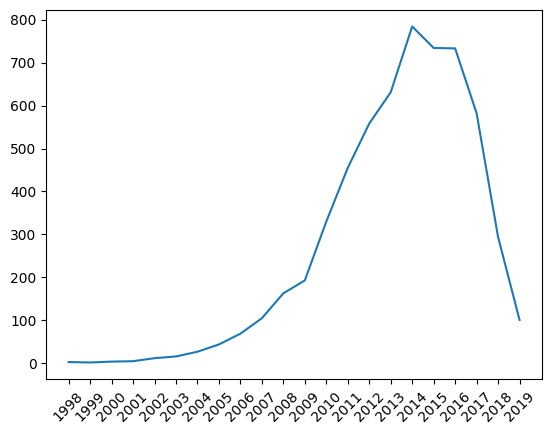

In [ ]:
# df.Year.value_counts().index
sns.lineplot(x=df.Year.value_counts().index, y=df.Year.value_counts().values)

# Customize the x-axis ticks
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show more values on the x-axis
# You can specify the desired tick positions and labels as needed
xtick_positions = df.Year.value_counts().index
xtick_labels = [str(year) for year in xtick_positions]

plt.xticks(ticks=xtick_positions, labels=xtick_labels)

plt.show()

<Axes: xlabel='Year'>

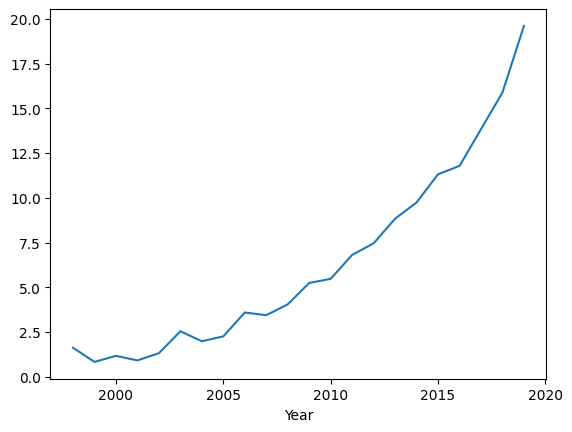

In [ ]:
sns.lineplot(x=df_p.groupby("Year").mean().index, y=df_p.groupby("Year").mean().Price.values)

#####  Insights
- The market of selling/buying old cars is profitable.
- The cars produced between 2010 - 2019 are the most sold ones.
- The newer the car, the higher the price.

#### 4.4 Visualize the market partitions

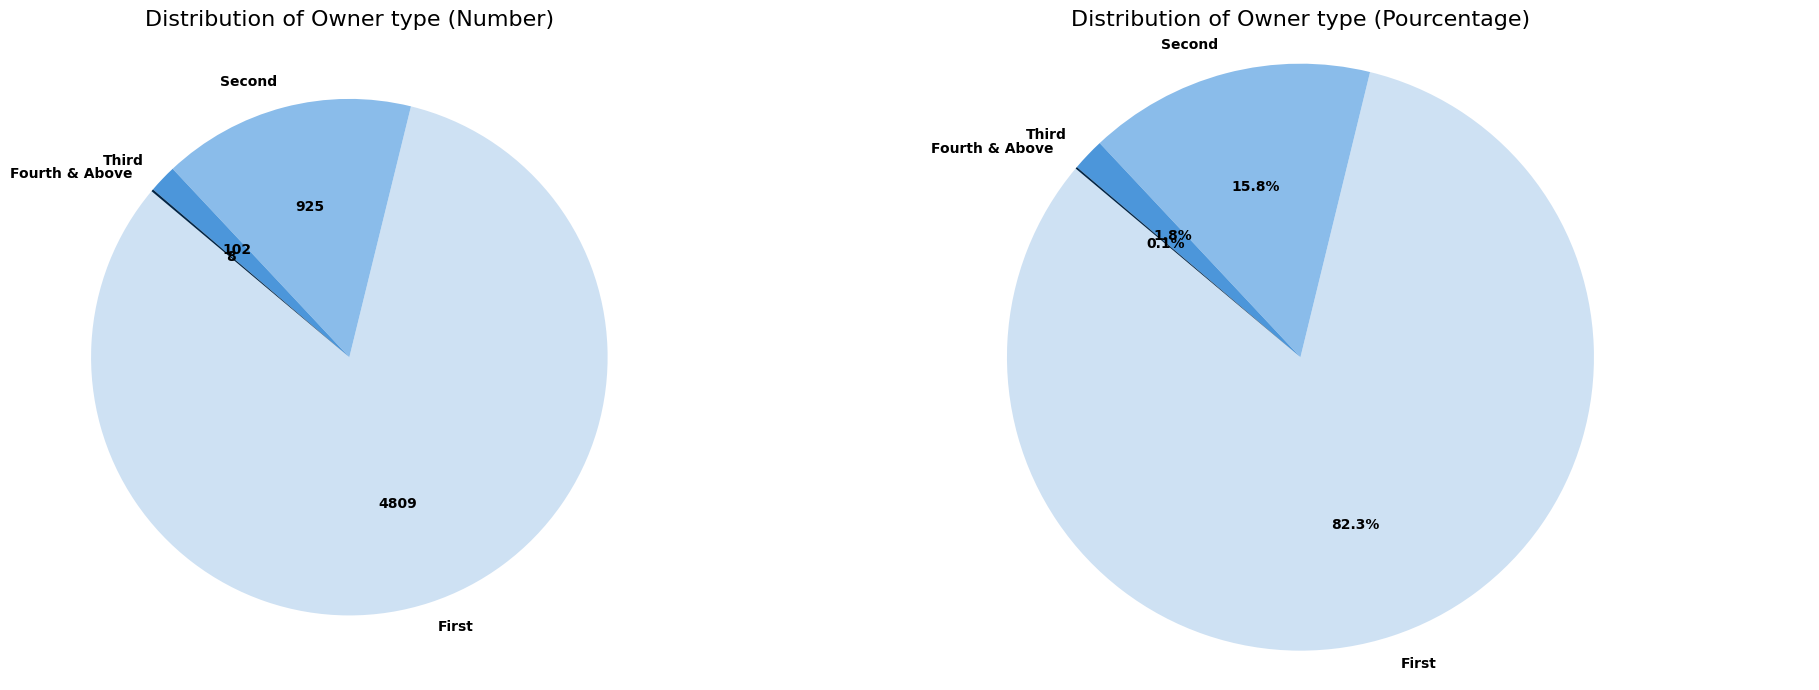

In [ ]:
import matplotlib.pyplot as plt

# Sample data for the first pie chart
Owner_Type = list(df.Owner_Type.value_counts().index)
values = list(df.Owner_Type.value_counts().values)
pourcentage = list(round(i/df.Owner_Type.value_counts().values.sum(),3)*100 for i in df.Owner_Type.value_counts().values)
colors = ['#CEE1F3', '#8ABCEA', '#4C96DA', '#012546']

# Create subplots
plt.figure(figsize=(20, 7))  # Adjust the figure size as needed

# Custom autopct function for the first pie chart to display exact values
def exact_values(pct):
    total = sum(data1)
    val = int(pct*total/100.0)
    return f'{val}'

# First pie chart
plt.subplot(1, 2, 1)
plt.pie(values, labels=Owner_Type, colors=colors, autopct=exact_values, startangle=140, textprops={'weight':'bold'})
plt.title('Distribution of Owner type (Number)', fontsize = 16)

# Second pie chart
plt.subplot(1, 2, 2)
plt.pie(pourcentage, labels=Owner_Type, colors=colors, autopct='%1.1f%%', startangle=140, textprops={'weight':'bold'})
plt.title('Distribution of Owner type (Pourcentage)',fontsize = 16)

# Ensure equal aspect ratio for both pie charts
plt.axis('equal')

plt.tight_layout()  # Ensure subplots don't overlap

# Show the pie charts
plt.show()

#####  Insights
- The majority of cars on the market are offered by their first owner.

### 5. Conclusions
- The market of selling/buying old cars is a growing market.
- The **Engines** and car **Power** are 2 major factors in the car price.
- The newer the car, the higher the price